In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import os


In [7]:

# Load data
df = pd.read_csv('data/MachineLearningRating_v3.txt', sep='\t')
df = pd.read_csv('data/MachineLearningRating_v3.txt', sep='|')

df['HasClaim'] = df['TotalClaims'] > 0
df['Margin'] = df['TotalPremium'] - df['TotalClaims']

C:\Users\belet\AppData\Local\Temp\ipykernel_25156\2372217876.py:3: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/MachineLearningRating_v3.txt', sep='|')


In [8]:
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims,HasClaim,Margin
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0,False,21.929825
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0,False,21.929825
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0,False,0.000000
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0,False,512.848070
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0,False,0.000000


In [13]:
results = []

# H0: No risk differences across provinces (Claim Frequency)
province_crosstab = pd.crosstab(df['Province'], df['HasClaim'])
chi2_stat, p_val, _, _ = stats.chi2_contingency(province_crosstab)
reject = p_val < 0.05
interpretation = f"Province Risk: p={p_val:.4f}, {'Reject' if reject else 'Fail to reject'} H0."
if reject:
    freq = df.groupby('Province')['HasClaim'].mean()
    interpretation += f" {freq.idxmax()} has highest claim frequency ({freq.max():.2%})."
results.append(interpretation)



In [14]:
print(province_crosstab)

HasClaim        False  True 
Province                    
Eastern Cape    30286     50
Free State       8088     11
Gauteng        392543   1322
KwaZulu-Natal  169298    483
Limpopo         24769     67
Mpumalanga      52590    128
North West     142938    349
Northern Cape    6372      8
Western Cape   170426    370


In [15]:
print(interpretation) # No significant risk differences

Province Risk: p=0.0000, Reject H0. Gauteng has highest claim frequency (0.34%).


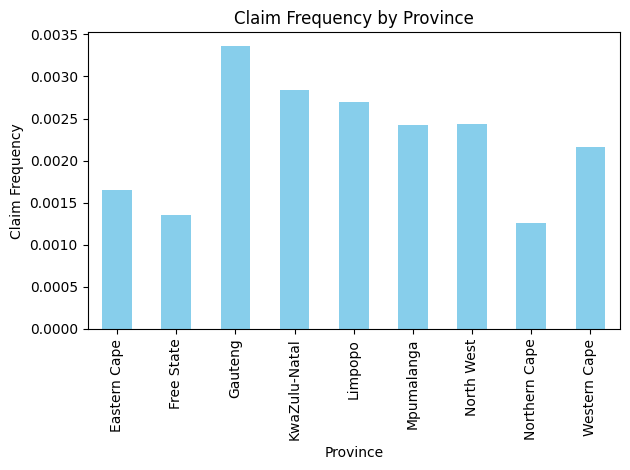

In [16]:

# Visualization: Claim frequency by province
freq.plot(kind='bar', color='skyblue')
plt.ylabel('Claim Frequency')
plt.title('Claim Frequency by Province')
plt.tight_layout()
plt.show()


In [17]:

# H0: No risk differences between postal codes (Claim Severity)
claim_severity_zip = [df[(df['PostalCode'] == z) & df['HasClaim']]['TotalClaims'] for z in df['PostalCode'].unique()]
claim_severity_zip = [x for x in claim_severity_zip if len(x) > 0]
if len(claim_severity_zip) > 1:
    f_stat, p_val = stats.f_oneway(*claim_severity_zip)
    reject = p_val < 0.05
    interpretation = f"PostalCode Risk: p={p_val:.4f}, {'Reject' if reject else 'Fail to reject'} H0."
    if reject:
        severity = df[df['HasClaim']].groupby('PostalCode')['TotalClaims'].mean()
        interpretation += f" PostalCode {severity.idxmax()} has highest severity ({severity.max():,.0f} Rand)."
    results.append(interpretation)
    


In [18]:
print(claim_severity_zip) 

[173586    92025.710526
206141     2800.000000
Name: TotalClaims, dtype: float64, 284    2040.473684
Name: TotalClaims, dtype: float64, 509862      6140.350877
520374      6140.350877
534962    114066.315789
652768     24066.798246
Name: TotalClaims, dtype: float64, 203    2294.096491
Name: TotalClaims, dtype: float64, 1560    46492.211754
1943     6140.350877
Name: TotalClaims, dtype: float64, 1779      26516.859649
889296     6140.350877
890038    62580.289474
890150     6140.350877
890229    25719.035088
892990    20968.535088
893382    21727.140351
988094     2156.701754
Name: TotalClaims, dtype: float64, 19213       750.649123
28867      6140.350877
28878     36298.298246
30907     11927.254386
31024     18791.649123
              ...     
980591      650.000000
981916     4824.561404
981926    21217.570175
994476     6140.350877
994577     1150.000000
Name: TotalClaims, Length: 486, dtype: float64, 134513    163104.473684
Name: TotalClaims, dtype: float64, 2072       4385.964912


In [21]:
print(interpretation)

PostalCode Risk: p=0.0335, Reject H0. PostalCode 4680 has highest severity (260,088 Rand).


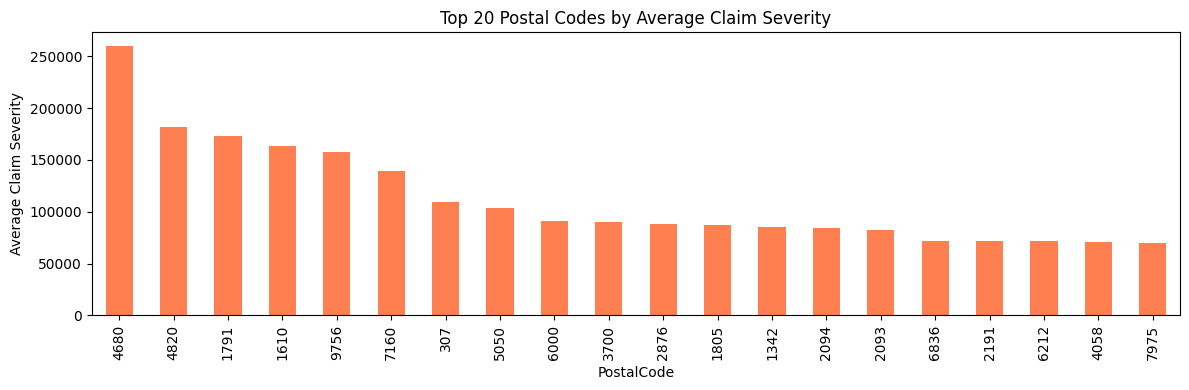

In [29]:
severity.nlargest(20).plot(kind='bar', figsize=(12, 4), color='coral')
plt.ylabel('Average Claim Severity')
plt.title('Top 20 Postal Codes by Average Claim Severity')
plt.tight_layout()
plt.show()
    

In [ ]:
# H0: No significant margin difference between postal codes
margin_zip = [df[df['PostalCode'] == z]['Margin'] for z in df['PostalCode'].unique()]
f_stat, p_val = stats.f_oneway(*margin_zip)
reject = p_val < 0.05
interpretation = f"PostalCode Margin: p={p_val:.4f}, {'Reject' if reject else 'Fail to reject'} H0."
if reject:
    margin = df.groupby('PostalCode')['Margin'].mean()
    interpretation += f" PostalCode {margin.idxmax()} has highest margin ({margin.max():,.0f} Rand)."
results.append(interpretation)


In [25]:
print(margin_zip)

[0          21.929825
1          21.929825
2           0.000000
3         512.848070
4           0.000000
             ...    
995092    722.065526
995093    258.867368
995094    258.867368
995095    258.867368
995096    258.867368
Name: Margin, Length: 622, dtype: float64, 12      21.929825
13     458.051613
14     709.980000
15     709.980000
16     526.759355
          ...    
391    709.980000
532      0.000000
533     75.928749
534    117.689561
535    117.689561
Name: Margin, Length: 81, dtype: float64, 18        0.119561
19        0.597807
20        0.597807
21        0.597807
22        0.597807
            ...   
937260    1.293947
937261    1.293947
937262    0.000000
937263    0.000000
937264    0.000000
Name: Margin, Length: 2110, dtype: float64, 24         1.038421
25         1.038421
26         1.038421
27         1.038421
28         1.038421
            ...    
919057    74.561404
919058    74.561404
919059    74.561404
919060    74.561404
919061     9.474912
Name: Margin

In [27]:
print(interpretation)

PostalCode Risk: p=0.0335, Reject H0. PostalCode 4680 has highest severity (260,088 Rand).


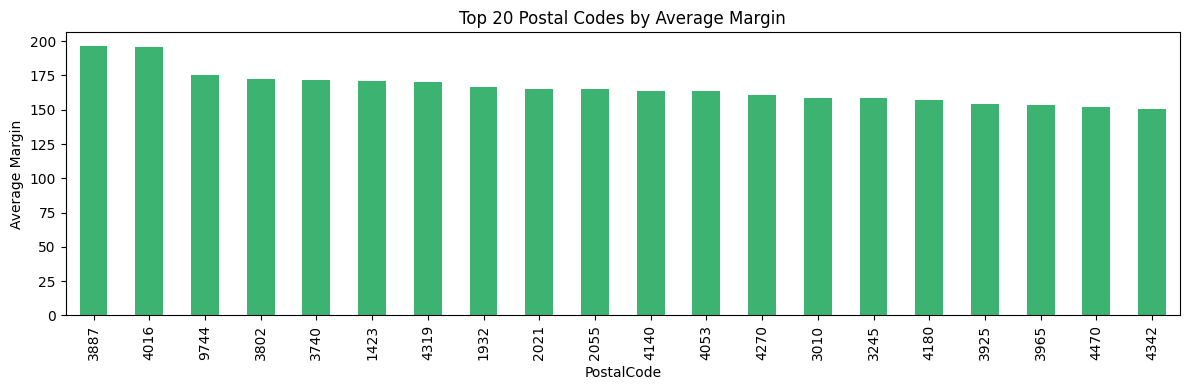

In [28]:
# Visualization: Average margin by postal code (top 20)
margin = df.groupby('PostalCode')['Margin'].mean()
margin.nlargest(20).plot(kind='bar', figsize=(12, 4), color='mediumseagreen')
plt.ylabel('Average Margin')
plt.title('Top 20 Postal Codes by Average Margin')
plt.tight_layout()
plt.show()


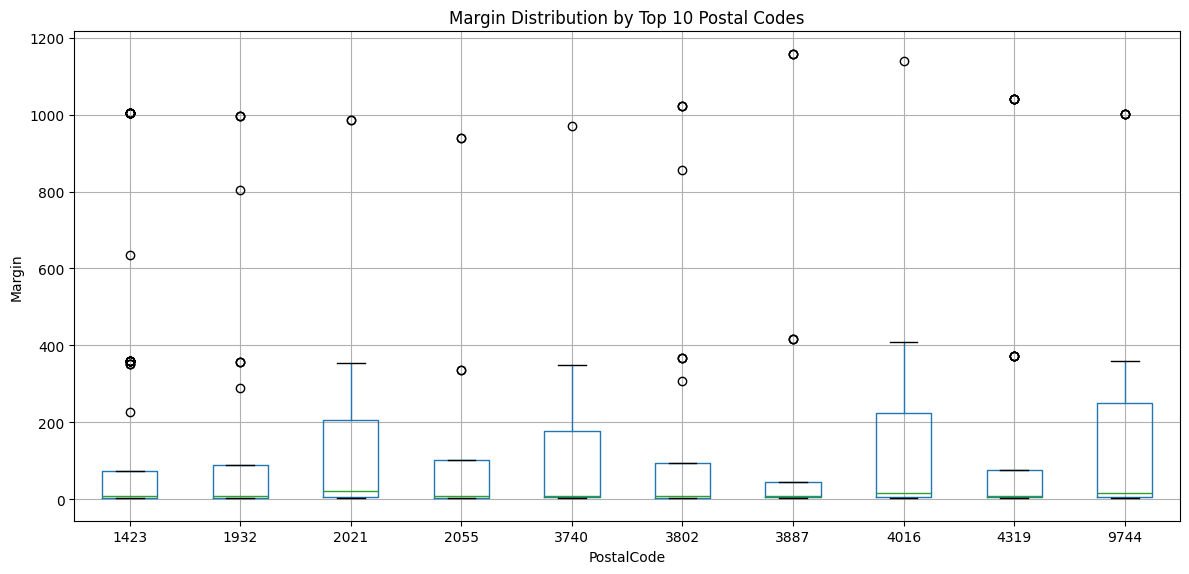

In [32]:
top_postal_codes = margin.nlargest(10).index
df[df['PostalCode'].isin(top_postal_codes)].boxplot(column='Margin', by='PostalCode', figsize=(12, 6))
plt.ylabel('Margin')
plt.title('Margin Distribution by Top 10 Postal Codes')
plt.suptitle('')
plt.tight_layout()
plt.show()


In [33]:

# H0: No risk difference between Women and Men (Claim Frequency)
gender_data = df[df['Gender'].isin(['Male', 'Female'])]
gender_crosstab = pd.crosstab(gender_data['Gender'], gender_data['HasClaim'])
chi2_stat, p_val, _, _ = stats.chi2_contingency(gender_crosstab)
reject = p_val < 0.05
interpretation = f"Gender Risk: p={p_val:.4f}, {'Reject' if reject else 'Fail to reject'} H0."
if reject:
    freq = gender_data.groupby('Gender')['HasClaim'].mean()
    interpretation += f" {freq.idxmax()} has higher claim frequency ({freq.max():.2%})."
results.append(interpretation)



In [36]:
print(gender_data)

         UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
28622                  47541      3878  2014-08-01 00:00:00            False   
28623                  47541      3878  2014-10-01 00:00:00            False   
28624                  47541      3878  2014-12-01 00:00:00            False   
28625                  47541      3878  2015-03-01 00:00:00            False   
28626                  47537      3878  2014-11-01 00:00:00            False   
...                      ...       ...                  ...              ...   
1000093                31520       389  2015-04-01 00:00:00            False   
1000094                31520       389  2015-06-01 00:00:00            False   
1000095                31520       389  2015-08-01 00:00:00            False   
1000096                31519       389  2014-07-01 00:00:00            False   
1000097                31519       389  2015-02-01 00:00:00            False   

        Citizenship   LegalType Title L

In [37]:
print(interpretation)


Gender Risk: p=0.9515, Fail to reject H0.


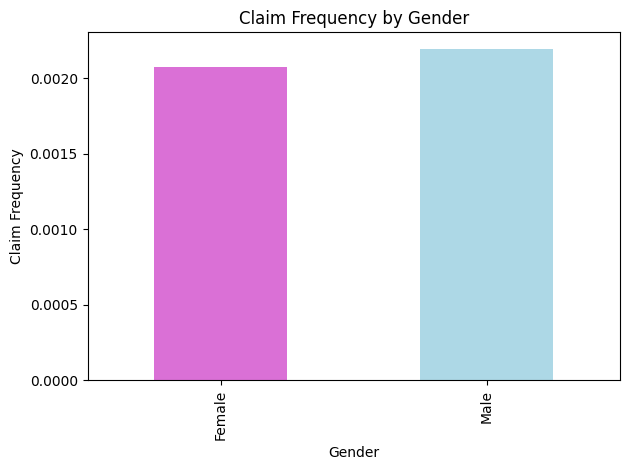

In [38]:
# Visualization: Claim frequency by gender
freq = gender_data.groupby('Gender')['HasClaim'].mean()
freq.plot(kind='bar', color=['orchid', 'lightblue'])
plt.ylabel('Claim Frequency')
plt.title('Claim Frequency by Gender')
plt.tight_layout()
plt.show()


In [39]:

# Save Report
def save_hypothesis_report(results):
    with open('reports/hypothesis_testing_report.txt', 'w') as f:
        f.write("Hypothesis Testing Results:\n")
        f.write("\n".join(results))
    os.system('git add reports/hypothesis_testing_report.txt')
    os.system('git commit -m "Add hypothesis testing report"')
